# Phase 1 Code Challenge Review 

_November 4, 2020_ 

TOPICS TO BE COVERED:
- Pandas Operations
- Data Visualization
- Statistics
- Python Data Structure

#### 1. Pandas Operations

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [4]:
# import data from a file 
df = sns.load_dataset('iris')

# what if this file is in a directory?

df2 = pd.read_csv('auto-mpg.csv')

In [5]:
# examine the first few elements of it
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# examine the dimensions of it
df.shape

(150, 5)

In [11]:
# check to see if you have missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
# introduce some missing values

df.iloc[2:10,1:2] = np.nan
df.isnull().sum()

sepal_length    0
sepal_width     8
petal_length    0
petal_width     0
species         0
dtype: int64

In [18]:
df.dropna(subset = ['sepal_width'], axis = 0)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
10,5.4,3.7,1.5,0.2,setosa
11,4.8,3.4,1.6,0.2,setosa
12,4.8,3.0,1.4,0.1,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# drop them by certain columns


In [19]:
# convert and modify columns

# create a new column, that is 10 times the sepal length, called sepal length 10
df['sepal_length_10'] = df['sepal_length'] * 10
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10
0,5.1,3.5,1.4,0.2,setosa,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0
2,4.7,NaN,1.3,0.2,setosa,47.0
3,4.6,NaN,1.5,0.2,setosa,46.0
4,5.0,NaN,1.4,0.2,setosa,50.0


In [20]:
# another way?
df['sepal_length_10_lambda'] = df['sepal_length'].apply(lambda x: x*10)

#### 2. Data Visualization

In [31]:
# how many species are there, and how many flowers are in each species
df.groupby(['species']).size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [46]:
# let's plot the average pedal length for each species of iris 
petal_length_by_sp = df.groupby(['species']).petal_length.mean()

[Text(0, 0, 'flower1'), Text(0, 0, 'flower2'), Text(0, 0, 'flower3')]

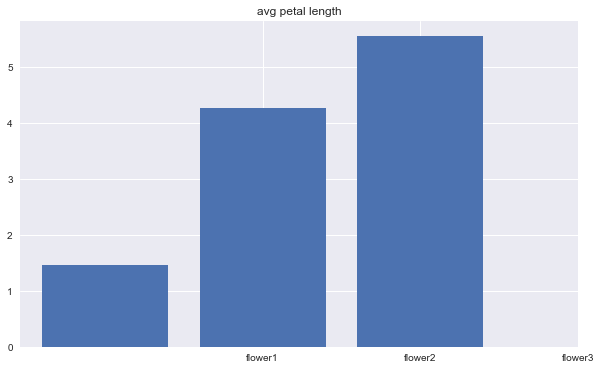

In [47]:
x = petal_length_by_sp.index
y = petal_length_by_sp
figure, ax = plt.subplots(figsize = (10,6))
ax.bar(x, y)
ax.set_title('avg petal length')
# ax.set_xlabel('species')
ax.set_xticks([1,2,3])
ax.set_xticklabels(['flower1','flower2','flower3'])

<BarContainer object of 4 artists>

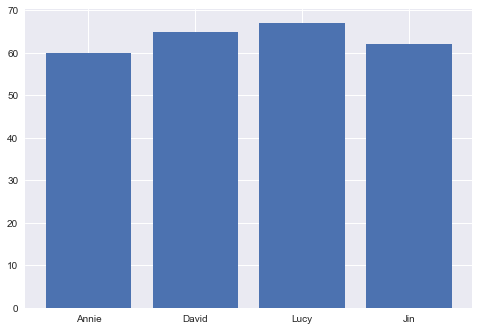

In [39]:
# your turn - create a bar chart using the following dummy data
persons = ['Annie', 'David', 'Lucy','Jin']
height = [60, 65, 67, 62]

plt.bar(persons, height)


In [ ]:
# scatterplot 
figure, ax = plt.subplots()

ax.set_title('sepal length vs sepal width')
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')

x = df.sepal_length
y = df.sepal_width

ax.scatter(x, y)

In [48]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_10,sepal_length_10_lambda
sepal_length,1.000000,-0.092449,0.871754,0.817941,1.000000,1.000000
sepal_width,-0.092449,1.000000,-0.414134,-0.349062,-0.092449,-0.092449
petal_length,0.871754,-0.414134,1.000000,0.962865,0.871754,0.871754
petal_width,0.817941,-0.349062,0.962865,1.000000,0.817941,0.817941
sepal_length_10,1.000000,-0.092449,0.871754,0.817941,1.000000,1.000000
sepal_length_10_lambda,1.000000,-0.092449,0.871754,0.817941,1.000000,1.000000


Can you describe the relationship above?

#### 3. Statistics 

In [55]:
# calculate the mean and median value for sepal length 
# print(df.sepal_length.mean())
# print(df.sepal_length.median())
df.sepal_length.agg(['mean', 'median'])

mean      5.843333
median    5.800000
Name: sepal_length, dtype: float64

In [ ]:
# what can you say about the distribution of sepal length and sepal width based on this distribution? 
Distribution is right skewed

In [76]:
# which flower has the longest pedal? what is the species of that flower
# max_petal_length = df.groupby(['species'])['petal_length'].max()
df.sort_values(by = 'petal_length', ascending = False).head(1)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_length_10_lambda
118,7.7,2.6,6.9,2.3,virginica,77.0,77.0


#### 4. Python Data Structure 

In [77]:
get_money = {'get':
            [{'get':[{
                'get':'money'
            }]}]}

In [78]:
# get the money 
get_money['get'][0]['get'][0]['get']

'money'

In [79]:
groomer_info = { 'pets':
    [{'Ginger': [{
        'age': 5,
        'type': 'Pitbull',
        'attribute': ['Playful','Cheery','Hyper']
    }],
    'Chloe': [{
        'age': 1,
        'type': 'Maine Coon Cat',
        'attribute': ['Alert','Independent','Playful']
    }],
    'Joe Rogan': [{
        'age': 8,
        'type': 'Parrot',
        'attribute': ['Loud','Opinionated','Annoying']
    }],
    'Rick Astley': [{
        'age': 2,
        'type': 'Labrador',
        'attributes': ['never','gives','you','up']
    }]}]
}    

In [85]:
# explore the structure of dictionary
groomer_info.values()

dict_values([[{'Ginger': [{'age': 5, 'type': 'Pitbull', 'attribute': ['Playful', 'Cheery', 'Hyper']}], 'Chloe': [{'age': 1, 'type': 'Maine Coon Cat', 'attribute': ['Alert', 'Independent', 'Playful']}], 'Joe Rogan': [{'age': 8, 'type': 'Parrot', 'attribute': ['Loud', 'Opinionated', 'Annoying']}], 'Rick Astley': [{'age': 2, 'type': 'Labrador', 'attributes': ['never', 'gives', 'you', 'up']}]}]])

In [87]:
# create a list of names containing all pets' names
# output should be ['Ginger', 'Chloe', 'Joe Rogan', 'Rick Astley]
list(groomer_info['pets'][0].keys())



['Ginger', 'Chloe', 'Joe Rogan', 'Rick Astley']

In [108]:
#  create a list that contain all pets' types
# desired output ['Pitbull','Maine Coon','Parrot','Labrador']
pet_type = []
for n in groomer_info['pets'][0].values():
    pet_type.append(n[0]['type'])

pet_type



['Pitbull', 'Maine Coon Cat', 'Parrot', 'Labrador']

In [110]:
# create a list that contain all pets age 
pet_age = []
for name, value in groomer_info['pets'][0].items():
    pet_age.append((name, value[0]['age']))

pet_age

[('Ginger', 5), ('Chloe', 1), ('Joe Rogan', 8), ('Rick Astley', 2)]

In [ ]:
# create a function that returns the names of pets who is older than x years old

# the function should take in a dictionary containing all pet information, 
# and an integer indicating age you want to compare
def pets_older_than(groomer_info, age):
    older_than = []
    for name, value in groomer_info['pets'][0].items():
        if value[0]['age'] > age:
            older_than.append(name)
    return older_than


In [ ]:
pets_older_than(groomer_info,4)
>>> ['Ginger','Joe Rogan']


syntax of list comprehension: [expression for item in collection if xxx else xxx]
for example:
[i*2 for i in list]